![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Proyecto 1 - Predicción de precios de vehículos usados

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desasrrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de precios de vehículos usados".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/t/4bd64c1deb3c4ffb8ca7ff93c1f1497d).

## Datos para la predicción de precios de vehículos usados

En este proyecto se usará el conjunto de datos de Car Listings de Kaggle, donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como: año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [3]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTest_carListings.zip', index_col=0)

In [4]:
# Visualización datos de entrenamiento
dataTraining.head()

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler


In [5]:
# Visualización datos de test
dataTesting.head()

,Year,Mileage,State,Make,Model
ID,,,,,
0,2014,31909,MD,Nissan,MuranoAWD
1,2017,5362,FL,Jeep,Wrangler
2,2014,50300,OH,Ford,FlexLimited
3,2004,132160,WA,BMW,5
4,2015,25226,MA,Jeep,Grand


In [6]:
# Valores negativos en variable de respuesta
dataTraining.Price[dataTraining.Price<=0].count()

0

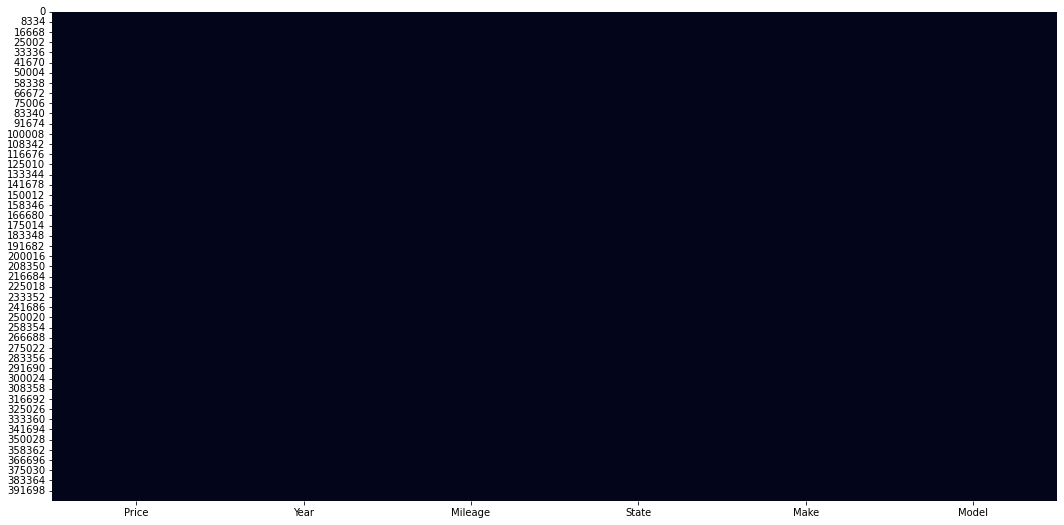

In [7]:
# Vistazo general de datos faltantes
plt.figure(figsize=(18, 9))
sns.heatmap(dataTraining.isnull(), cbar=False)
plt.show()

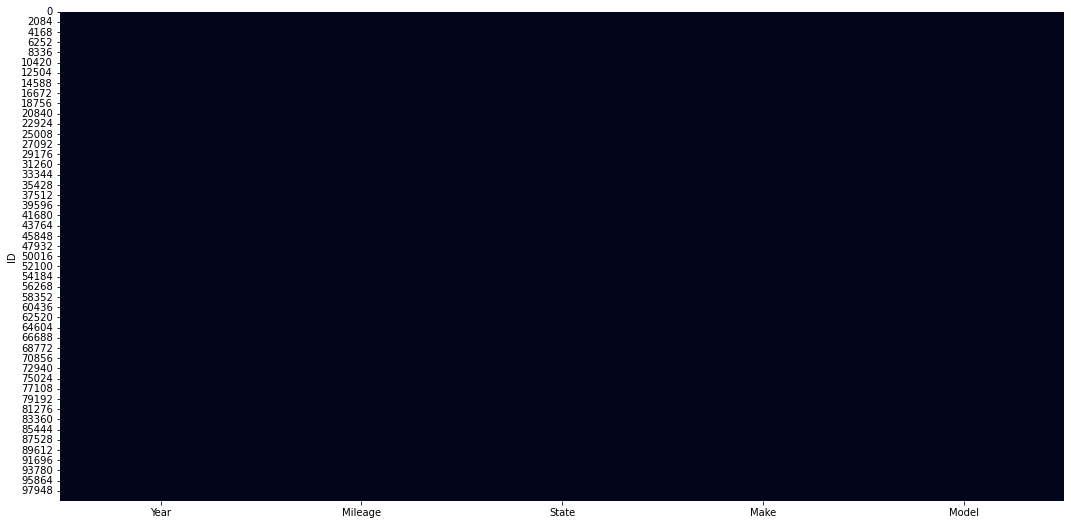

In [8]:
# Vistazo general de datos faltantes
plt.figure(figsize=(18, 9))
sns.heatmap(dataTesting.isnull(), cbar=False)
plt.show()

In [9]:
# Encoding variables categóricas
for c in dataTraining.columns:
    if dataTraining[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(dataTraining[c].values)) 
        dataTraining[c] = lbl.transform(list(dataTraining[c].values))

In [10]:
# Encoding variables categóricas
for c in dataTesting.columns:
    if dataTesting[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(dataTesting[c].values)) 
        dataTesting[c] = lbl.transform(list(dataTesting[c].values))

In [11]:
#Carga de datos
XTotal = dataTraining.drop(['Price'], axis=1).to_numpy()
yTotal = dataTraining['Price'].to_numpy()

#Partición de datos
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=2)

In [12]:
# Entrenamiento de modelo
regressor = XGBRegressor()
regressor.fit(XTrain, yTrain)
y_pred = regressor.predict(XTest)
rms = mean_squared_error(yTest, y_pred, squared=False)
rms

3660.02634015941

In [13]:
# Generar archivo para envío
y_pred = regressor.predict(dataTesting)
pd.DataFrame(y_pred, columns=['Price']).to_csv('test_submission.csv', index_label='ID')

In [15]:
# Validación cruzada
folds=10
kf = KFold(n_splits=folds)
#kf.get_n_splits(XTotal)

i = 1
for train_index, test_index in kf.split(XTotal):
    X_trainCV, X_testCV = XTotal[train_index], XTotal[test_index]
    y_trainCV, y_testCV = yTotal[train_index], yTotal[test_index]
    
    regressor = XGBRegressor()
    regressor.fit(X_trainCV, y_trainCV)
    y_pred = regressor.predict(X_testCV)
    rms = mean_squared_error(y_testCV, y_pred, squared=False)
    print(rms)
    
    y_pred = regressor.predict(dataTesting)
    pd.DataFrame(y_pred, columns=['Price']).to_csv(str(i)+'.csv', index_label='ID')
    
    i += 1

3671.7199257971115
3662.1355131230735
3661.2944393400176
3736.1674674086403
3609.18980332112
3622.5180595380853
3663.9854095026853
3611.229259012962
3692.2927094411407
3648.6263383859578
